# Introduction to Computer Vision by Georgia Tech
Course notes and challenges recreated for Python OpenCV

In [2]:
import numpy as np
import cv2
from matplotlib import  pyplot as plt
%matplotlib inline

## Lesson 2

In [2]:
#load an image
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)


In [3]:
#get image size
height, width = img_data.shape
print(f'This image is {height} x {width} pixels')


This image is 2405 x 3000 pixels


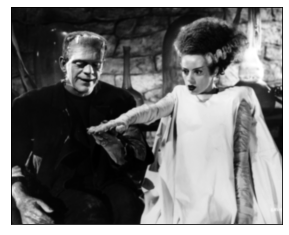

In [4]:
# display with matplotlib
plt.imshow(img_data, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


In [5]:
#get pixel values
middle_pixel = img_data[height // 2, width // 2]
print(f'The middle pixel has a value of {middle_pixel}, or {middle_pixel * 100 // 255}% white')


The middle pixel has a value of 113, or 44% white


### Select, display region

In [6]:
region_size = 700
half_region = region_size // 2
cols = width // 2 - half_region, width // 2 + half_region
rows = height // 2 - half_region, height // 2 + half_region
middle_region = img_data[cols[0]:cols[1], rows[0]:rows[1]]


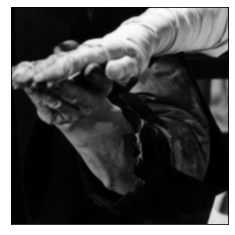

In [7]:
# display with matplotlib
plt.imshow(middle_region, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


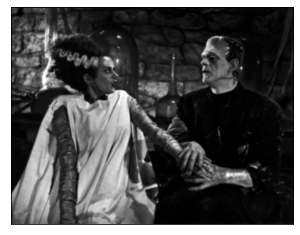

In [8]:
#load color image, display individual color plane
color_data = cv2.imread('bof_colorized_big.jpg', cv2.IMREAD_COLOR)

#display image
plt.imshow(color_data[:, :, 0], cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()


### Add, subtract, and blend images

In [9]:
#load an image
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img_data.shape

#divide into images of equal size
img_1 = img_data[:, width // 2:]
img_2 = img_data[:, :width // 2]

#add two images,save result
composite_add = img_1 + img_2
cv2.imwrite('addition.png', composite_add)

#subtract one image from another
composite_subtract = img_1 - img_2
cv2.imwrite('subtraction.png', composite_subtract)

#average two images by adding half from each
#imga/2 + imgb/2
composite_avg = img_1 / 2 + img_2 / 2 
_ = cv2.imwrite('average.png', composite_avg)


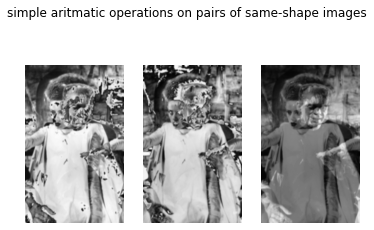

In [10]:
# display with matplotlib
fig, (sp1, sp2, sp3) = plt.subplots(1, 3)
fig.suptitle('simple aritmatic operations on pairs of same-shape images')
sp1.imshow(composite_add, cmap='gray', interpolation='bicubic')
sp2.imshow(composite_subtract, cmap='gray', interpolation='bicubic')
sp3.imshow(composite_avg, cmap='gray', interpolation='bicubic')
_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]


### Add noise

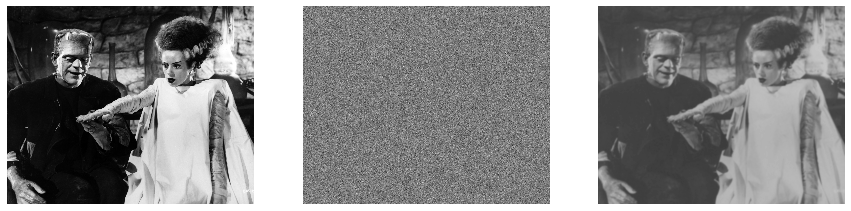

In [11]:
#load demo photo
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)

#generate array of gaussian noise in range 0 to 255, equal size to demo photo
noise = np.random.normal(size=img_data.shape) #mean 0, std 1
noise = noise + np.full(img_data.shape, abs(noise.min())) #shift noise to positive values
scale_coeff = 255 / noise.max() #determine scale coeff
noise *= scale_coeff #scale noise to range of 8-bit uint values, 0 to 255

#add noise to photo
noisy = img_data + noise
cv2.imwrite('noisy_bride.png', noisy)

# display with matplotlib

fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=[15, 10])
sp1.imshow(img_data, cmap='gray')
sp2.imshow(noise, cmap='gray')
sp3.imshow(noisy, cmap='gray', interpolation='bicubic')
_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]


## Lesson 3

### Removing Noise
##### 1D

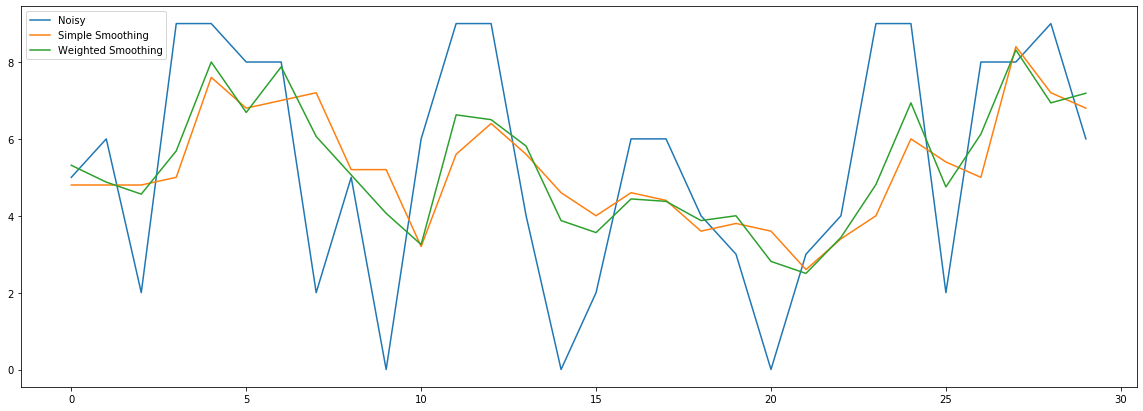

In [12]:
#noisy values
values = np.random.randint(0, 10, 34)

#uniform moving average to smooth noise, weights 0111110 
simple_ma = [value for value in values[:2]]
for idx, value in enumerate(values[2:-2]):
    simple_ma.append((values[idx - 2] + values[idx - 1] + value + values[idx + 1] + values[idx + 1])/5)
    
_ = [simple_ma.append(value) for value in values[-2:]]
        
#weighted moving average to smooth noise, weights 0146410
weighted_ma = [value for value in values[:2]]
for idx, value in enumerate(values[2:-2]):
    weighted_ma.append((values[idx - 2] + (values[idx - 1] * 4) + (value * 6) + (values[idx + 1] * 4) + values[idx + 1])/16)
    
_ = [weighted_ma.append(value) for value in values[-2:]]

#trim equivalent ends
values = values[2:-2]
simple_ma = simple_ma[2:-2]
weighted_ma = weighted_ma[2:-2]

plt.figure(figsize=[20, 7])
_ = plt.plot(range(values.size), values, label='Noisy')
_ = plt.plot(range(values.size), simple_ma, label='Simple Smoothing')
_ = plt.plot(range(values.size), weighted_ma, label='Weighted Smoothing')
_ = plt.legend(loc=2)

plt.savefig('smoothing.png')

##### 2D

In [13]:
def local_simple_avg(array, center):
    result = 0
    row, col = center
    #return value for weighted average around center
    #ne, n, nw, w, center, sw, s, se, e of center
    location_values = np.array([
                array[row - 1, col - 1],
                array[row - 1, col],
                array[row - 1, col + 1],
                array[row, col - 1],
                array[row, col],
                array[row, col + 1],
                array[row + 1, col -1 ],
                array[row + 1, col],
                array[row + 1, col + 1]])
    return location_values.sum() / 9

def local_weighted_avg(array, center):
    result = 0
    row, col = center
    #return value for weighted average around center
    #ne, n, nw, w, center, sw, s, se, e of center
    location_values = np.array([
                array[row - 1, col - 1] * 1,
                array[row - 1, col] * 2,
                array[row - 1, col + 1] * 1,
                array[row, col - 1] * 2,
                array[row, col] * 4,
                array[row, col + 1] * 1,
                array[row + 1, col -1 ] * 2,
                array[row + 1, col] * 1,
                array[row + 1, col + 1] * 2])
    
    return location_values.sum() / 16
    

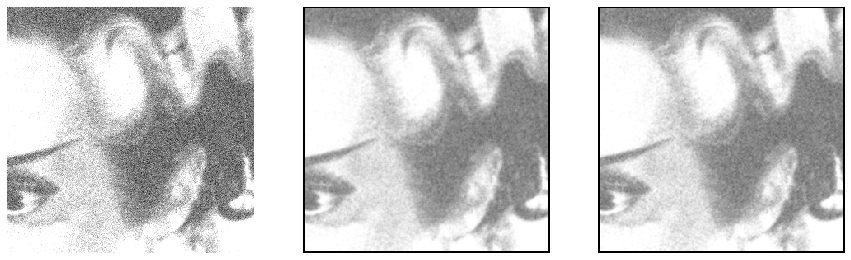

In [14]:
img_data = cv2.imread('noisy_bride.png', cv2.IMREAD_GRAYSCALE)

region_size = 300
center = [650, 2200]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

face = img_data[cols[0]:cols[1], rows[0]:rows[1]]

smoothed_data_simple = np.zeros_like(face)
smoothed_data_weighted = np.zeros_like(face)

rows, columns = face.shape

for row in range(rows):
    for col in range(columns):
        if row > 2 and col > 2 and row < rows - 2 and col < columns - 2:
            smoothed_data_simple[row, col] = local_simple_avg(face, [row, col])
            smoothed_data_weighted[row, col] = local_weighted_avg(face, [row, col])
        
fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=[15, 10])
sp1.imshow(face, cmap='gray')
sp2.imshow(smoothed_data_simple, cmap='gray')
sp3.imshow(smoothed_data_weighted, cmap='gray')

_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]
plt.savefig('smoothing_2d.png')


##### 2D with tools

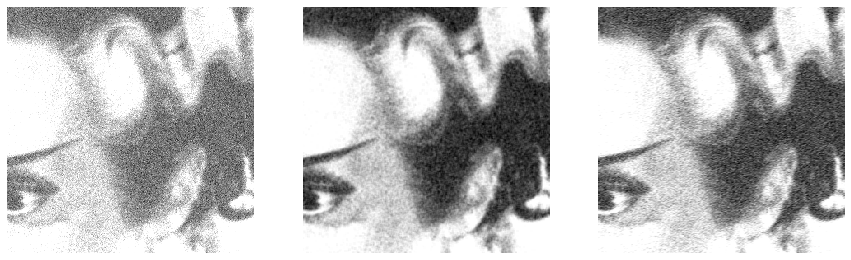

In [15]:
#do with filter tools

img_data = cv2.imread('noisy_bride.png', cv2.IMREAD_GRAYSCALE)

region_size = 300
center = [650, 2200]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

face = img_data[cols[0]:cols[1], rows[0]:rows[1]]

smoothed_data_simple = np.zeros_like(face)
smoothed_data_gaussian = np.zeros_like(face)

rows, columns = face.shape

flat_smoothing_kernel = np.ones((3, 3)) / 9
gaussian_kernel = cv2.getGaussianKernel(9, 1).reshape(3, 3)

#ddepth argument value of -1 will output with same depth as input
smoothed_data_simple = cv2.filter2D(face, -1, flat_smoothing_kernel)
smoothed_data_gaussian = cv2.filter2D(face, -1, gaussian_kernel)

fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=[15, 10])
sp1.imshow(face, cmap='gray')
sp2.imshow(smoothed_data_simple, cmap='gray')
sp3.imshow(smoothed_data_gaussian, cmap='gray')

_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]
plt.savefig('smoothing_2d_tools.png')


## Lesson 4
More on filtering and operation linearity, convolution, correlation,  and boundary issues.

#### Edge options
To prevent the output from being smaller than the input, it is necessary to pad the border in some way to be able to calculate the edge pixels.

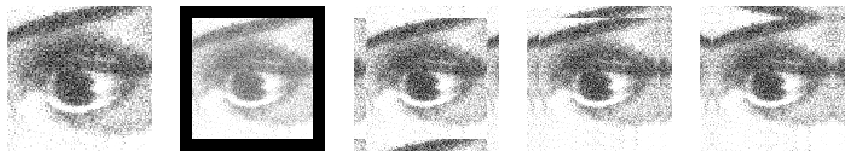

In [16]:
#edge options: clip, wrap around, copy, reflect

img_data = cv2.imread('noisy_bride.png', cv2.IMREAD_GRAYSCALE)

region_size = 100
center = [730, 2060]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

eye = img_data[cols[0]:cols[1], rows[0]:rows[1]]

#create output to visualize different edge methods
#black border, "clipped"
clipped_edge = np.zeros([eye.shape[0], 10])
image_clipped = np.concatenate([clipped_edge, eye, clipped_edge], axis=1)
clipped_edge = np.zeros([10, image_clipped.shape[1]])
image_clipped = np.concatenate([clipped_edge, image_clipped, clipped_edge], axis=0)

#wraparound border
wrapped_edges = eye[:, :10], eye[:, -10:]
image_wrapped = np.concatenate([wrapped_edges[1], eye, wrapped_edges[0]], axis=1)
wrapped_edges = image_wrapped[:10, :], image_wrapped[-10:, :]
image_wrapped = np.concatenate([wrapped_edges[1], image_wrapped, wrapped_edges[0]], axis=0)

#duplicated border
copied_edges = eye[:, :10], eye[:, -10:]
image_copied = np.concatenate([copied_edges[0], eye, copied_edges[1]], axis=1)
copied_edges = image_copied[:10, :], image_copied[-10:, :]
image_copied = np.concatenate([copied_edges[0], image_copied, copied_edges[1]], axis=0)

#reflected border
reflected_edges = eye[:, :10][:, ::-1], eye[:, -10:][:, ::-1]
image_reflected = np.concatenate([reflected_edges[0], eye, reflected_edges[1]], axis=1)
reflected_edges = image_reflected[:10, :][::-1, :], image_reflected[-10:, :][::-1]
image_reflected = np.concatenate([reflected_edges[0], image_reflected, reflected_edges[1]], axis=0)

fig, (sp1, sp2, sp3, sp4, sp5) = plt.subplots(1, 5, figsize=[15, 10])
sp1.imshow(eye, cmap='gray')
sp2.imshow(image_clipped, cmap='gray')
sp3.imshow(image_wrapped, cmap='gray')
sp4.imshow(image_copied, cmap='gray')
sp5.imshow(image_reflected, cmap='gray')

_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3, sp4, sp5]]
plt.savefig('edge_methods.png')

#### Sharpening filter
filtering with 2-step unsharp mask sharpening, better diy convolve function, and reflect edge method


In [17]:
def filter_2d(data, kernel, output_divide):
    #return output data from given input image data and filter kernel
    output = np.zeros(data.shape, dtype=np.int16)
    kernel_half = (kernel.shape[0] - 1) // 2 #border thickness depends on kernel size
    padded_data = reflect_border(data, kernel_half)
    rows, columns = padded_data.shape
    
    for row in range(kernel_half, rows - kernel_half):
        for col in range(kernel_half, columns - kernel_half):
            local_slice = padded_data[row - kernel_half:row + kernel_half + 1, col - kernel_half:col + kernel_half + 1]
            value = local_slice * kernel
            output[row-kernel_half, col-kernel_half] = value.sum() // output_divide
            
    return output

def reflect_border(image, border_thickness):
    #return padded image data
    #reflected border
    reflected_edges = image[:, :border_thickness][:, ::-1], image[:, -border_thickness:][:, ::-1]
    image_reflected = np.concatenate([reflected_edges[0], image, reflected_edges[1]], axis=1)
    reflected_edges = image_reflected[:border_thickness, :][::-1, :], image_reflected[-border_thickness:, :][::-1]
    image_reflected = np.concatenate([reflected_edges[0], image_reflected, reflected_edges[1]], axis=0)
    
    return image_reflected

def unsharp_mask(image_data):
    #original filtered with impulse [[0, 0, 0], [0, 2, 0], [0, 0, 0]]
    #plus original filtered with box filter [[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9
    #impulse_filter = np.array([[0, 0, 0], [0, 2, 0], [0, 0, 0]], dtype=np.int8)
    #box_filter = np.ones_like(impulse_filter)
    
    #sharpened = filter_2d(image_data, impulse_filter, 1) + filter_2d(image_data, box_filter, 9)
    
    #or combined alternative kernel, from wikipedia
    um_filter = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]], dtype=np.int32)
    sharpened = filter_2d(image_data, um_filter, 256)
    return sharpened


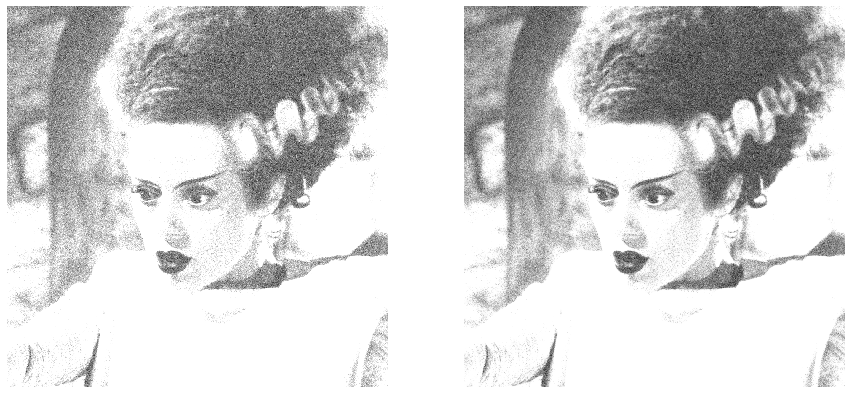

In [18]:
img_data = cv2.imread('noisy_bride.png', cv2.IMREAD_GRAYSCALE)

region_size = 1000
center = [730, 2060]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

face = img_data[cols[0]:cols[1], rows[0]:rows[1]]

um_sharpened_face = unsharp_mask(face)

fig, (sp1, sp2) = plt.subplots(1, 2, figsize=[15, 10])
sp1.imshow(face, cmap='gray')
sp2.imshow(um_sharpened_face, cmap='gray')
_ = [ax.set_axis_off() for ax in [sp1, sp2]]
plt.savefig('unsharp_mask.png')


In [19]:
#try median filter
#iterate over image to copy values in 3x3 area, sort set of surrounding values
#copy median to corresponding location in output image

def median_filter(data, kernel_size):
    #return output data from given input image data and filter kernel
    output = np.zeros(data.shape, dtype=np.int16)
    kernel_half = (kernel_size - 1) // 2 #border thickness depends on kernel size
    padded_data = reflect_border(data, kernel_half)
    rows, columns = padded_data.shape
    
    for row in range(kernel_half, rows - kernel_half):
        for col in range(kernel_half, columns - kernel_half):
            local_slice = padded_data[row - kernel_half:row + kernel_half + 1, col - kernel_half:col + kernel_half + 1]
            values = sorted(local_slice.flatten())
            output[row-1, col-1] = values[4]
            
    return output


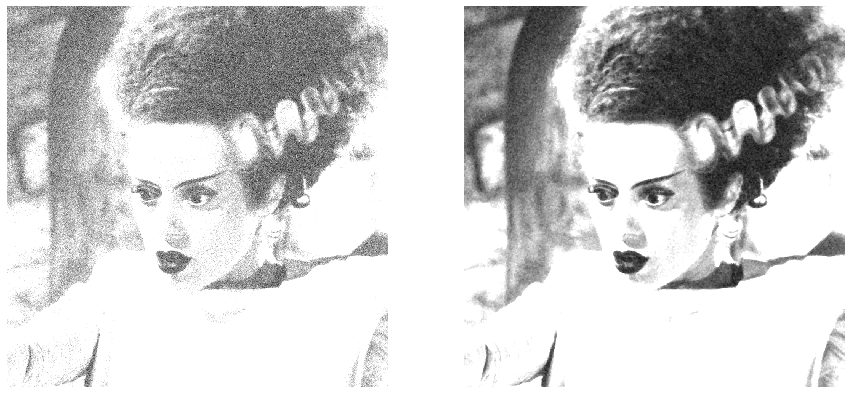

In [20]:
img_data = cv2.imread('noisy_bride.png', cv2.IMREAD_GRAYSCALE)

region_size = 1000
center = [730, 2060]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

face = img_data[cols[0]:cols[1], rows[0]:rows[1]]

#use median filter a few times to augment effect
kernel_size = 3
filtered_face = median_filter(face, kernel_size)
more_filtered_face = median_filter(filtered_face, kernel_size)
mm_filtered_face = median_filter(more_filtered_face, kernel_size)

fig, (sp1, sp2) = plt.subplots(1, 2, figsize=[15, 10])
sp1.imshow(face, cmap='gray')
sp2.imshow(mm_filtered_face, cmap='gray')

_ = [ax.set_axis_off() for ax in [sp1, sp2]]
plt.savefig('median_filter.png')


## Lesson 5
More on filtering, normalized correlation, template matching

In [21]:
#1d cross correlation filter
#given discrete signal and template, find where template occurs in signal
#find, return the starting index where the template occurs


In [22]:
#2d template matching
#use filters as templates to find where they occur in an image
#correlate image with template to produce map
#return index for max value on map; indicates matched location


## Lesson 6
Edges, gradients, differential operators in one dimension

In [23]:
#try taking partial derivatives of an image in one direction, display image and partial derivatives of x and y

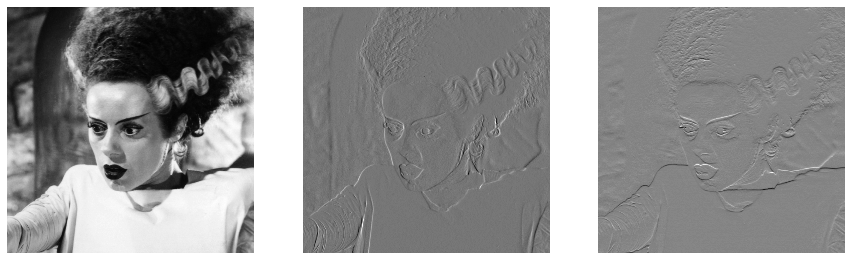

In [24]:
#try using sobel operator on x and y
#sx = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] / 8
#sy = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]] / 8

img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)

region_size = 1000
center = [730, 2060]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

face = img_data[cols[0]:cols[1], rows[0]:rows[1]]

sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

x_gradient = filter_2d(face, sx, 8)
y_gradient = filter_2d(face, sy, 8)

fig, (sp1, sp2, sp3) = plt.subplots(1, 3, figsize=[15, 10])
sp1.imshow(face, cmap='gray')
sp2.imshow(x_gradient, cmap='gray')
sp3.imshow(y_gradient, cmap='gray')

_ = [ax.set_axis_off() for ax in [sp1, sp2, sp3]]
plt.savefig('sobel_gradients.png')

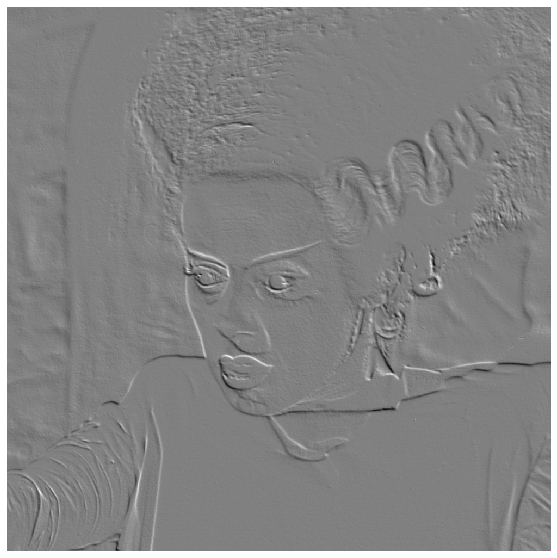

In [25]:
plt.figure(figsize=[15, 10])
plt.axis('off')
plt.imshow(x_gradient + y_gradient, cmap='gray')

## Lesson 7
Edges in two dimensions

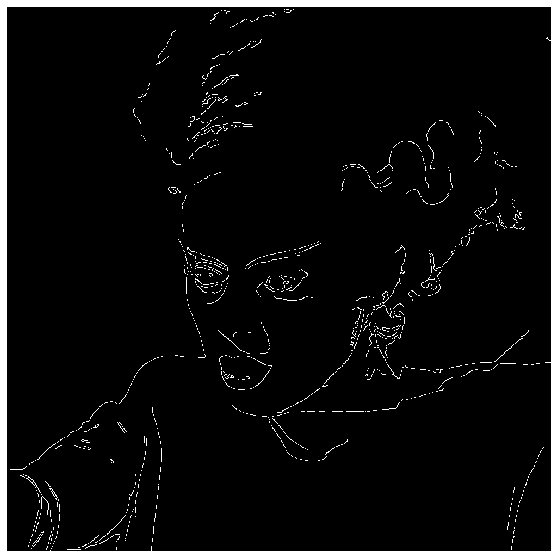

In [35]:
#canny edge operator, filter with derivative of gaussian
blurred = cv2.blur(face, (3, 3))
edges = cv2.Canny(blurred, 50, 125, 7, L2gradient=True)

plt.figure(figsize=[15, 10])
plt.axis('off')
plt.imshow(edges, cmap='gray')

## Lesson 8
Voting, Huough Transform

In [27]:
#given points that belong to a line, what is a line?
#how many lines are there?
#which points belong to shich lines?

In [28]:
#line in an image corresponds to a point in Hough space
#point in image space is a line in Hough space

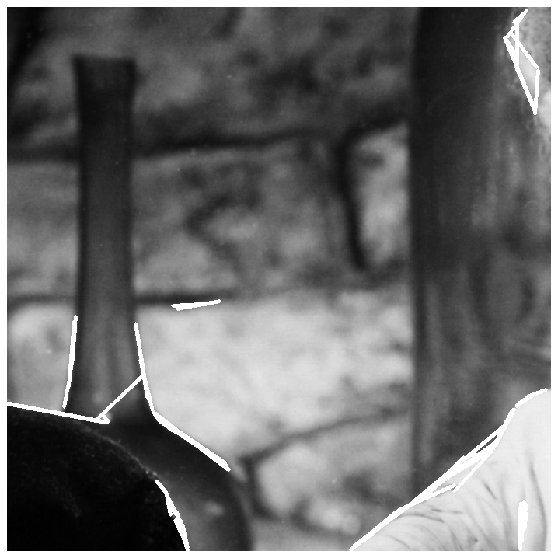

In [59]:
img_data = cv2.imread('bride_large.jpg', cv2.IMREAD_GRAYSCALE)

region_size = 700
center = [730, 1500]
half_region = region_size // 2
cols = center[0] - half_region, center[0] + half_region
rows = center[1] - half_region, center[1] + half_region

back_set = img_data[cols[0]:cols[1], rows[0]:rows[1]]

blurred = cv2.blur(back_set, (7, 7))
edges = cv2.Canny(blurred, 25, 100)
line_length = 10
line_gap = 50
threshold = 10
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength=line_length, maxLineGap=line_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        start = (x1, y1)
        end = (x2, y2)
        color = (255, 255, 255)
        cv2.line(back_set, start, end, color, 3)
    
plt.figure(figsize=[15, 10])
plt.axis('off')
plt.imshow(back_set, cmap='gray')

## Lesson 9
Hough transform on circles 

## Lesson 10
Generalized Hough Transform

## Lesson 11
Fourier Transform

## Lesson 18
Stereo Correspondence

In [78]:
#reproduction of Find Best Match Quiz

def find_best_match(patch, strip):
    #find patch in strip and return x column index of top-left corner
    
    #get sum of square differences for this alignment
    return 170

def sum_sq_dif(image_a, image_b):
    diff = image_a - image_b
    diff_sq = diff**2
    return np.sum(diff_sq)
    
def get_ssd_along_strip(patch, strip):
    strip_ssd = []
    strip_length = strip.shape[1]
    window_size = patch.shape[1]
    for column in range(1, strip_length):
        strip_portion = strip[:, column:(column + window_size)]
        ssd = sum_sq_dif(patch, strip_portion)
        strip_ssd.append(ssd)
    return strip_ssd

#load images
left = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
right = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

#define image patch location
patch_loc = [120, 170] #row, column
patch_size = [100, 100]

#extract patch from left stereo image
rows = patch_loc[0], patch_loc[0] + patch_size[0]
cols = patch_loc[1], patch_loc[1] + patch_size[1]
patch_left = left[rows[0]:rows[1], cols[0]:cols[1]]

#extract strip from right stereo image
strip_right = right[rows[0]:rows[1], :]

#look for the patch in the strip and report the likely starting x position
best_x = find_best_match(patch_left, strip_right)

#get corresponding patch from right image
patch_right = right[rows[0]:rows[1], best_x:best_x + patch_size[1]]

In [79]:
sum_sq_dif(patch_left, patch_right)

988211

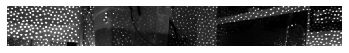

In [34]:


plt.axis('off')
plt.imshow(strip_right, cmap='gray')




In [20]:
patch_loc

[170, 170]

In [38]:
#load images
left = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
right = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)
new = np.hstack([left, right])

cv2.imwrite('find_points.png', new)

True